In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

2024-10-01 11:37:21.671678: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 11:37:21.709619: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 11:37:22.045656: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 11:37:22.047932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 11:37:22.770655: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D


In [5]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [6]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


num_classes = 10

In [16]:
num_classes = 10
model = models.Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))  # input_shape here
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=num_classes, activation='softmax'))


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10


/home/oem/.local/lib/python3.8/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 22s 11ms/step - loss: 0.2427 - accuracy: 0.9545 - val_loss: 0.0507 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0603 - accuracy: 0.9818 - val_loss: 0.0585 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0610 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0567 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0362 - accuracy: 0.9893 - val_loss: 0.0520 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0580 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.0400 - val_accura

In [19]:
!pip install matplotlib

     |████████████████████████████████| 9.2 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 86.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 48.8 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 124.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 122.4 MB/s eta 0:00:01


In [20]:
import matplotlib.pyplot as plt

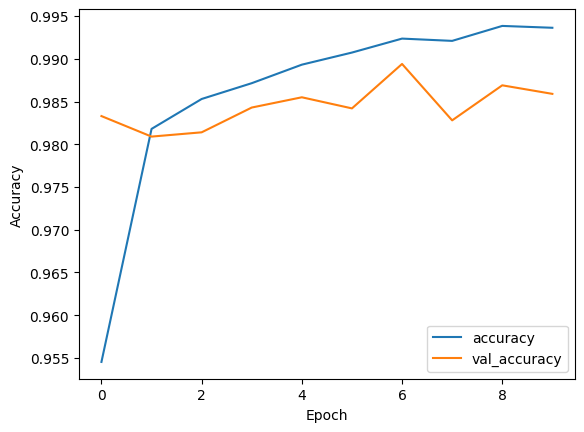

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


In [22]:
test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=2)


1875/1875 - 8s - loss: 0.0170 - accuracy: 0.9951 - 8s/epoch - 4ms/step


In [26]:
print(f'Testing accuracy: {test_acc*100}')

Testing accuracy: 99.50500130653381


In [27]:
import numpy as np

1/1 [==============================] - 0s 24ms/step
Predicted digit: 9
True label: 9


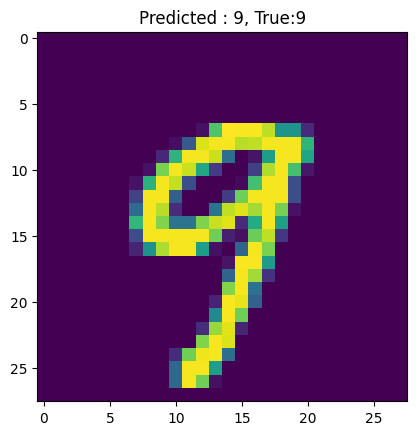

In [31]:
n=45
sample_image = X_train[n]
sample_label = Y_train[n]

prediction = model.predict(sample_image.reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

print(f"Predicted digit: {predicted_digit}")
print(f"True label: {sample_label}")

plt.imshow(sample_image)
plt.title(f"Predicted : {predicted_digit}, True:{sample_label}")
plt.show()